In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Preprocessed_data.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,Is there a car,Is there a property,Number of Children,Annual Income,Education Level,Age,Duration of work,Is there a mobile phone,...,Status_No_loan_for_the_month,Marital Status_Married,Marital Status_Separated,Marital Status_Single / not married,Marital Status_Widow,Way of Living_House / apartment,Way of Living_Municipal apartment,Way of Living_Office apartment,Way of Living_Rented apartment,Way of Living_With parents
0,0,0,1,0,2,270000.0,1,36,6.39,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,81000.0,1,49,1.05,1,...,0,0,0,1,0,1,0,0,0,0
2,2,1,1,1,0,270000.0,3,54,2.86,1,...,0,1,0,0,0,1,0,0,0,0
3,3,0,1,1,1,112500.0,1,41,5.43,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,1,1,2,139500.0,1,48,15.49,1,...,0,1,0,0,0,1,0,0,0,0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
X = df.drop(labels='Target', axis=1)
y = df['Target']

In [6]:
X.shape

(537667, 26)

In [7]:
y.shape

(537667,)

In [8]:
# Checking imbalanced dataset

In [9]:
y.value_counts()

0    535705
1      1962
Name: Target, dtype: int64

In [10]:
(1962/535705)*100

0.3662463482700367

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train.shape

(430133, 26)

In [14]:
X_test.shape

(107534, 26)

In [15]:
y_train.shape

(430133,)

In [16]:
y_test.shape

(107534,)

In [17]:
y_train.value_counts()

0    428559
1      1574
Name: Target, dtype: int64

In [18]:
y_test.value_counts()

0    107146
1       388
Name: Target, dtype: int64

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
confusion_matrix(y_pred, y_test)

array([[107146,      0],
       [     0,    388]], dtype=int64)

In [25]:
accuracy_score(y_pred, y_test)

1.0

In [26]:
pd.DataFrame(model.feature_importances_, X_train.columns)

,0
Gender,0.0
Is there a car,0.0
Is there a property,0.0
Number of Children,0.0
Annual Income,0.0
Education Level,0.0
Age,0.0
Duration of work,0.0
Is there a mobile phone,0.0
Is there a work phone,0.0


In [27]:
# Applying StratifiedKFold Validation

In [28]:
from sklearn.model_selection import StratifiedKFold

In [29]:
strtfdKFold = StratifiedKFold(n_splits=10)

In [30]:
kfold = strtfdKFold.split(X_train, y_train)

In [31]:
scores = []

In [32]:
for k, (train, test) in enumerate(kfold):
    model.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = model.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [385703   1416], Accuracy: 1.000
Fold:  2, Training/Test Split Distribution: [385703   1416], Accuracy: 1.000
Fold:  3, Training/Test Split Distribution: [385703   1416], Accuracy: 1.000
Fold:  4, Training/Test Split Distribution: [385703   1417], Accuracy: 1.000
Fold:  5, Training/Test Split Distribution: [385703   1417], Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: [385703   1417], Accuracy: 1.000
Fold:  7, Training/Test Split Distribution: [385703   1417], Accuracy: 1.000
Fold:  8, Training/Test Split Distribution: [385703   1417], Accuracy: 1.000
Fold:  9, Training/Test Split Distribution: [385703   1417], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [385704   1416], Accuracy: 1.000


Cross-Validation accuracy: 1.000 +/- 0.000


In [33]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[14] <= 1.5\ngini = 0.007\nsamples = 387120\nvalue = [385704, 1416]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 385704\nvalue = [385704, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1416\nvalue = [0, 1416]')]

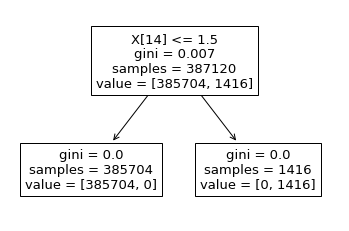

In [34]:
plot_tree(model)